# **1. Loading Dataset**

In [62]:
import pandas as pd
data = pd.read_csv('/Users/gaohanlin/Desktop/UCI/Python/Group project/Data/Clustering Data.csv')

In [64]:
data.head()

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# **2. Data Pre-Processing**

## 2.1 Missing Values

In [12]:
missing_value = data.isnull().sum()
missing_value

uid                          0
PNRLocatorID                 0
avg_amt                      0
round_trip                   0
group_size                   0
                            ..
UflyMemberStatus_Standard    0
seasonality_Q1               0
seasonality_Q2               0
seasonality_Q3               0
seasonality_Q4               0
Length: 90, dtype: int64

## 2.2 Preparing Columns for K-Means

### 2.2.0 Preserving the Original Data

In [14]:
clustering_data = data.copy()

In [16]:
clustering_data.head()

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,504554455244696420493F7C2067657420746869732072...,AADMLF,0.019524,0,0.000,0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,46495853454E44696420493F7C20676574207468697320...,AAFBOM,0.081774,1,0.000,0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,534355545444696420493F7C2067657420746869732072...,AAFILI,0.026650,0,0.125,1,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,44554D4D414E4E44696420493F7C206765742074686973...,AAFRQI,0.000000,1,0.000,0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### 2.2.2 Boolean Variables

In [18]:
clustering_data['uid'] = clustering_data['uid'].astype('category').cat.codes
clustering_data['PNRLocatorID'] = clustering_data['PNRLocatorID'].astype('category').cat.codes

In [70]:
clustering_data.head()

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,10322,0,0.019524,0.0,0.000,0.0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,3945,1,0.081774,1.0,0.000,0.0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,12113,2,0.026650,0.0,0.125,1.0,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,12114,2,0.026650,0.0,0.125,1.0,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,3353,3,0.000000,1.0,0.000,0.0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### 2.2.1 Continuous Variables

In [72]:
from sklearn.preprocessing import MinMaxScaler

continuous_cols = [
    "avg_amt",
    "round_trip",
    "group_size",
    "group",
    "days_pre_booked",
]

scaler = MinMaxScaler()
continuous_data = scaler.fit_transform(clustering_data[continuous_cols])
clustering_data[continuous_cols] = pd.DataFrame(continuous_data, columns=continuous_cols, index = clustering_data.index)
clustering_data.head()

,uid,PNRLocatorID,avg_amt,round_trip,group_size,group,days_pre_booked,BookingChannel_Other,BookingChannel_Outside_Booking,BookingChannel_Reservations_Booking,...,true_destination_dest_SXM,true_destination_dest_TPA,true_destination_dest_ZIH,UflyMemberStatus_Elite,UflyMemberStatus_non-ufly,UflyMemberStatus_Standard,seasonality_Q1,seasonality_Q2,seasonality_Q3,seasonality_Q4
0,10322,0,0.019524,0.0,0.000,0.0,0.029703,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,3945,1,0.081774,1.0,0.000,0.0,0.039604,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,12113,2,0.026650,0.0,0.125,1.0,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,12114,2,0.026650,0.0,0.125,1.0,0.069307,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,3353,3,0.000000,1.0,0.000,0.0,0.035361,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# **3. Clustering**

### 3.1 Optimum Number of Clusters

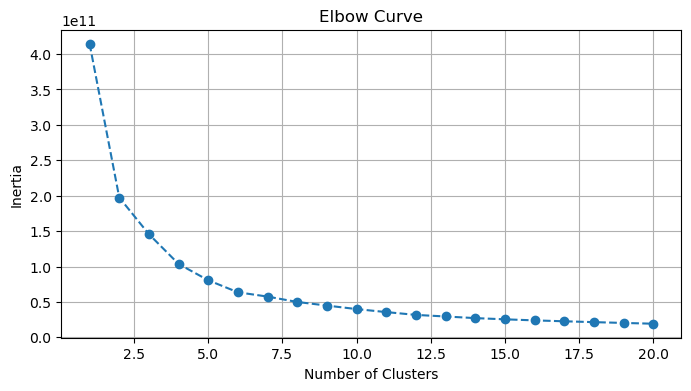

In [143]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
cluster_range = range(1, 21)
for cluster_num in cluster_range:
    kmeans = KMeans(n_clusters=cluster_num, n_init='auto', random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

# Elbow Curve
plt.figure(figsize=(8,4))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

## 3.2 Applying K-Means

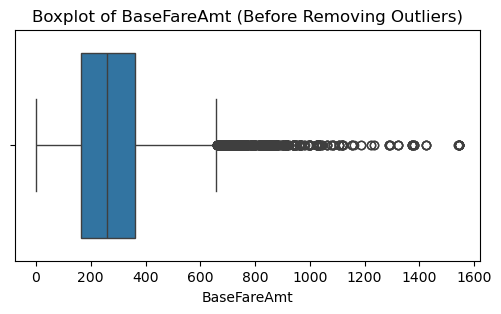

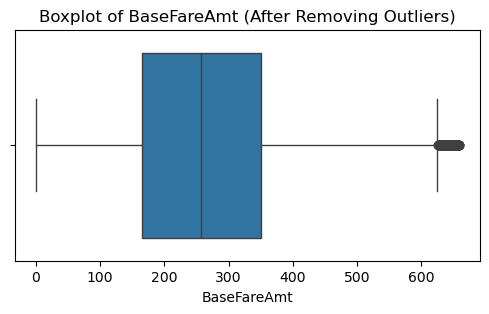

In [181]:
Q1 = final_dataframe['BaseFareAmt'].quantile(0.25) #compute lower quantile 
Q3 = final_dataframe['BaseFareAmt'].quantile(0.75) #compute higher quantile 
IQR = Q3 - Q1 #Calculate quantile range 
IQR_lower = Q1 - 1.5 * IQR 
IQR_upper = Q3 + 1.5 * IQR 
IQR_data = final_dataframe[(final_dataframe['BaseFareAmt'] >= IQR_lower) & (final_dataframe['BaseFareAmt'] <= IQR_upper)]

plt.figure(figsize=(6, 3))
sns.boxplot(x=final_dataframe['BaseFareAmt'])
plt.title("Boxplot of BaseFareAmt (Before Removing Outliers)")
plt.show()

plt.figure(figsize=(6, 3))
sns.boxplot(x=IQR_data['BaseFareAmt'])
plt.title("Boxplot of BaseFareAmt (After Removing Outliers)")
plt.show()

In [153]:
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans.fit(clustering_data)

data['Cluster'] = kmeans.labels_

In [155]:
number_of_clusters = data['Cluster'].nunique()

for i in range(number_of_clusters):
    print(f"The size of the Cluster {i}  |  {data[data['Cluster'] == i].shape[0]}")

The size of the Cluster 0  |  3285
The size of the Cluster 1  |  2709
The size of the Cluster 2  |  3478
The size of the Cluster 3  |  2615
The size of the Cluster 4  |  3057


## 3.3 Merge Data

In [157]:
import pandas as pd
data2 = pd.read_csv('/Users/gaohanlin/Desktop/UCI/Python/Group project/Data/sample_data_transformed.csv')
clustered_data = pd.DataFrame(data)
customer_data = pd.DataFrame(data2)
final_dataframe = customer_data.merge(clustered_data[['uid', 'Cluster']], on='uid', how='left') 
final_dataframe.head()

/var/folders/8f/02p9807568s7ch78w1fb5bbm0000gn/T/ipykernel_66864/3379963055.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('/Users/gaohanlin/Desktop/UCI/Python/Group project/Data/sample_data_transformed.csv')


,Unnamed: 0,PNRLocatorID,PaxName,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,EncryptedName,...,age_group,true_origins,final_destination,round_trip,group_size,group,seasonality,days_pre_booked,true_destination,Cluster
0,1,AADMLF,PETEJO,3.377490e+12,1,MSP,DFW,9/15/14,10/6/14,504554455244696420493F7C2067657420746869732072...,...,55+,MSP,DFW,0,1,0,Q4,21,DFW,0
1,2,AAFBOM,FIXSMO,3.372110e+12,2,JFK,MSP,7/22/14,8/19/14,46495853454E44696420493F7C20676574207468697320...,...,35-54,MSP,MSP,1,1,0,Q3,28,JFK,2
2,3,AAFBOM,FIXSMO,3.372110e+12,1,MSP,JFK,7/22/14,8/14/14,46495853454E44696420493F7C20676574207468697320...,...,35-54,MSP,MSP,1,1,0,Q3,23,JFK,2
3,4,AAFILI,SCUTKA,3.372110e+12,2,MSP,SEA,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,0
4,5,AAFILI,SCUTKA,3.372110e+12,1,LAN,MSP,2/6/14,3/27/14,534355545444696420493F7C2067657420746869732072...,...,25-34,LAN,SEA,0,2,1,Q1,49,MSP,0


# **4. Analysis and Visualiztion**

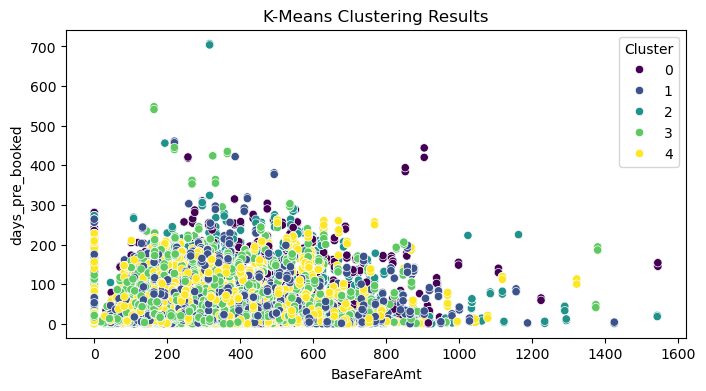

In [175]:
# Base Fare Amount vs days_pre_booked by cluster

plt.figure(figsize=(8, 4))
sns.scatterplot(x=final_dataframe['BaseFareAmt'], 
                y=final_dataframe['days_pre_booked'], 
                hue=final_dataframe['Cluster'], 
                palette='viridis')
plt.title("K-Means Clustering Results")
plt.show()

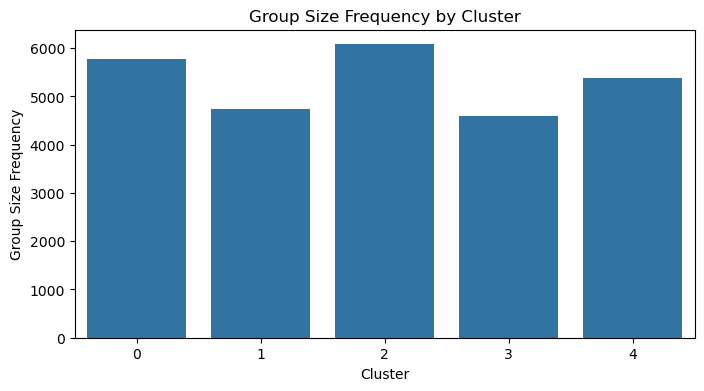

In [163]:
# Group Size by Cluster
plt.figure(figsize=(8,4))
sns.barplot(x='Cluster', y='group_size', data=final_dataframe, estimator=lambda x: len(x))
plt.title('Group Size Frequency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Group Size Frequency')
plt.show()

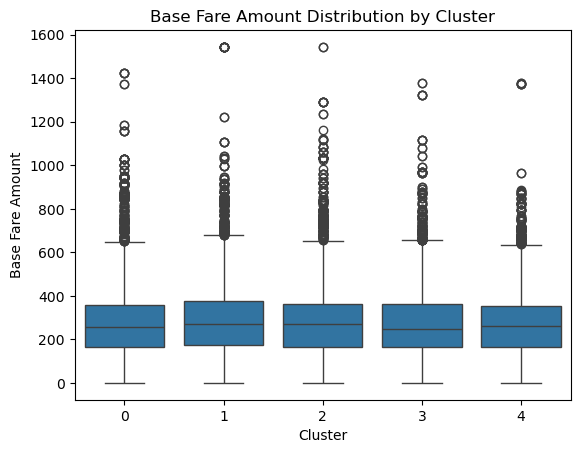

In [133]:
# Base Fare Amount Distribution by Cluster
import seaborn as sns
sns.boxplot(x='Cluster', y='BaseFareAmt', data=final_dataframe)
plt.title('Base Fare Amount Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Base Fare Amount')
plt.show()

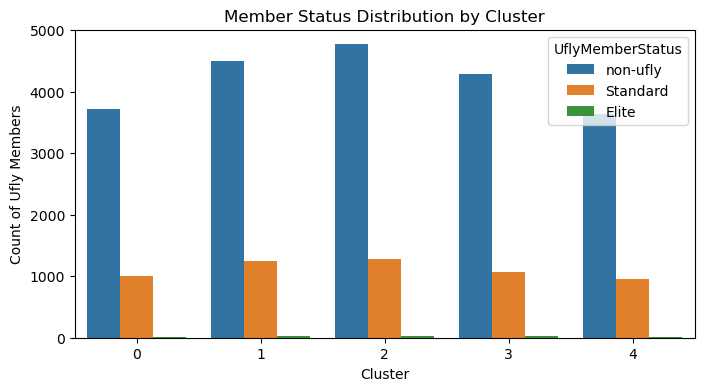

In [123]:
# Membership Status by Cluster

plt.figure(figsize=(8,4))
sns.countplot(x='Cluster', hue='UflyMemberStatus', data=final_dataframe)
plt.title('Member Status Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count of Ufly Members')
plt.show()

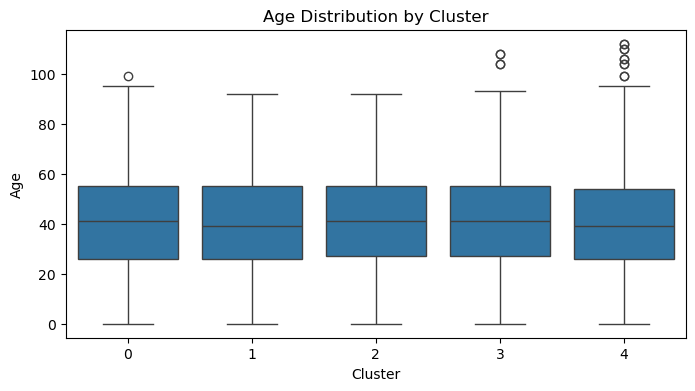

In [125]:
# Age distribution by Cluster

plt.figure(figsize=(8,4))
sns.boxplot(x='Cluster', y='Age', data=final_dataframe)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

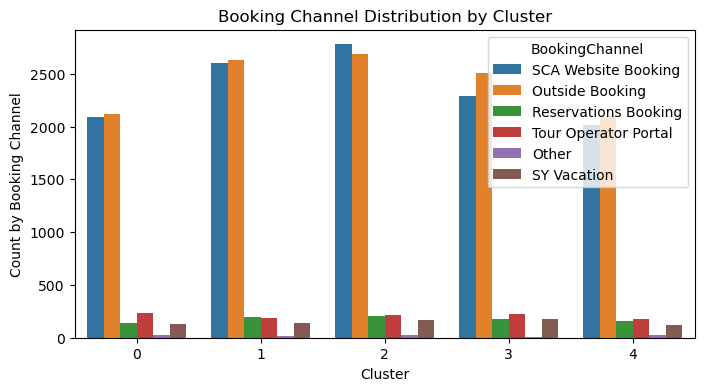

In [127]:
# Booking Channel by Cluster

plt.figure(figsize=(8,4))
sns.countplot(x='Cluster', hue='BookingChannel', data=final_dataframe)
plt.title('Booking Channel Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count by Booking Channel')
plt.show()